In [2]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from aeons.covariance import X_mu, X_Sigmainv, logX_mu, points_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
from aeons.models import LS, CG

#### **Showing work on correlations, quadratic**

In [151]:
nk = nk_dead_live(50, 100)
mean = X_mu(nk)
covinv = X_Sigmainv(nk)

In [158]:
X = generate_Xs(nk)
theta_true = 4
y = quad.func(X, theta_true)
ls = LS(y, quad, mean)
cg = CG(y, quad, mean, covinv)
theta_l = ls.minimise(theta_true)
theta_c = cg.minimise(theta_true)

/tmp/ipykernel_110756/3850994094.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Xarray), quad.func(Xarray, theta_c), lw=1, color='orange', label="Correlated smoothing")


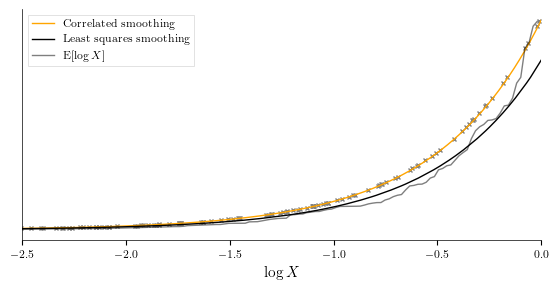

In [164]:
Xarray = np.linspace(0, 1, 1000)
plt.figure(figsize=(6.7, 3))
plt.plot(np.log(X), y, 'x', ms=3, color='gray')
plt.plot(np.log(Xarray), quad.func(Xarray, theta_c), lw=1, color='orange', label="Correlated smoothing")
plt.plot(np.log(quad.inverse(y, theta_l)), y, lw=1, color='black', label="Least squares smoothing")
plt.plot(np.log(mean), y, color='black', lw=1, alpha=0.5, label='$\mathrm{E}[\log X]$')
plt.xlim(-2.5, 0)
plt.yticks([])
plt.xlabel("$\log X$");
plt.legend();
# plt.savefig('../../../report/figures/correlations_quad.pdf', format='pdf', bbox_inches='tight')

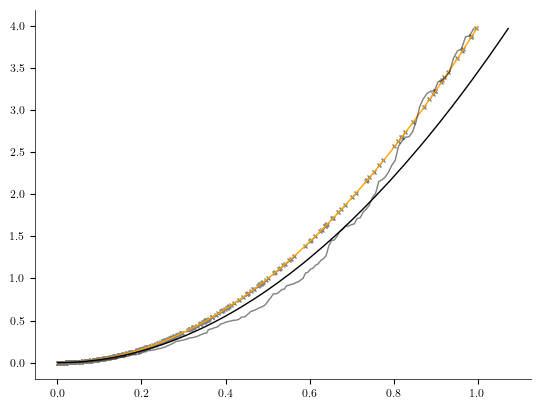

In [134]:
Xarray = np.linspace(0, 1, 1000)
plt.plot(X, y, 'x', ms=3, color='gray')
# plt.plot(mean, y)
plt.plot(Xarray, quad.func(Xarray, theta_c), lw=1, color='orange')
plt.plot(quad.inverse(y, theta_l), y, lw=1, color='black')
plt.plot(mean, y, color='black', lw=1, alpha=0.5)
plt.

#### **Work on correlations, L(X)**

In [156]:
nk = nk_dead(100, ndead=500)
mean = X_mu(nk)
covinv = X_Sigmainv(nk)

In [165]:
X = generate_Xs(nk)
like = middle
theta_true = [4, 0.1]
y = like.func(X, theta_true)
ls = LS(y, like, mean)
cg = CG(y, like, mean, covinv)
theta_l = ls.minimise(theta_true)
theta_c = cg.minimise(theta_true)

(-1e-06, 0.01)

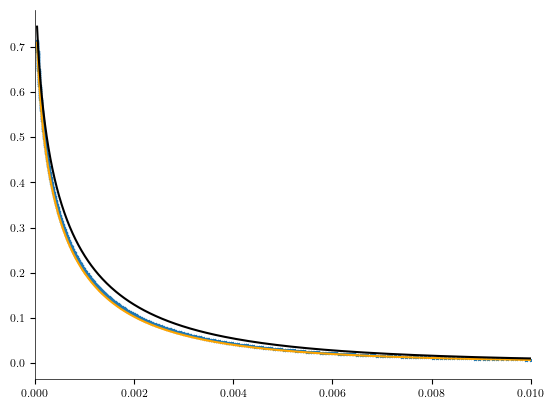

In [166]:
logXarray = np.linspace(-10, 0, 1000)
Xarray = np.exp(logXarray)
plt.plot(Xarray, np.exp(middle.func(Xarray, theta_true)), 'x', ms=2)
plt.plot(Xarray, np.exp(middle.func(Xarray, theta_c)), color='orange')
plt.plot(Xarray, np.exp(middle.func(Xarray, theta_l)), color='black')
plt.xlim(-1e-6, 1e-2)

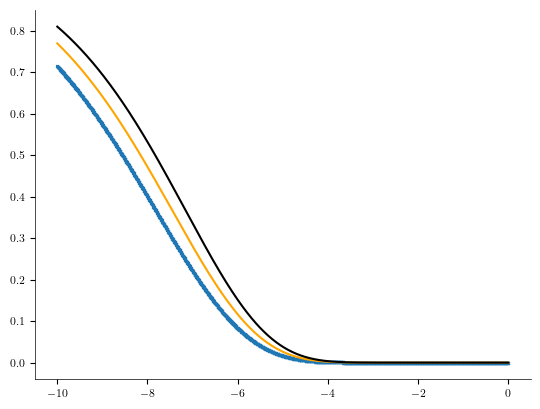

In [145]:
logXarray = np.linspace(-10, 0, 1000)
Xarray = np.exp(logXarray)
plt.plot(logXarray, np.exp(middle.func(Xarray, theta_true)), 'x', ms=2)
plt.plot(logXarray, np.exp(middle.func(Xarray, theta_c)), color='orange')
plt.plot(logXarray, np.exp(middle.func(Xarray, theta_l)), color='black')

#### **Maximum of evidence curve for correlated Gaussian**

In [165]:
ndead = 1000
nlive = 500
samples = points_at_iteration(samples_c_1, ndead)
nk = np.array(samples.nlive)
y = np.array(samples.logL)
mean = np.array(np.exp(samples.logX()))
covinv = X_Sigmainv(nk)
like = full

In [166]:
alphas = np.arange(0, 1.05, 0.05)
logZfs = []
for alpha in alphas:
    startf = int(ndead * (1 - alpha))
    Nex = startf
    penalty = Nex * np.log(Nex) - Nex if Nex != 0 else 0
    yf = y[startf:]
    meanf = mean[startf:]
    lsf = LS(yf, like, meanf)
    theta_lf = lsf.minimise([2, 10, 0.1])
    logZ_lf = lsf.logZ(theta_lf)# - penalty
    logZfs.append(logZ_lf)
logZfs = np.array(logZfs)

/home/zixiao/Documents/III/project/aeons/aeons/likelihoods.py:109: RuntimeWarning: invalid value encountered in power
  return (2*sigma**2 * (logLmax - logL))**(d/2)


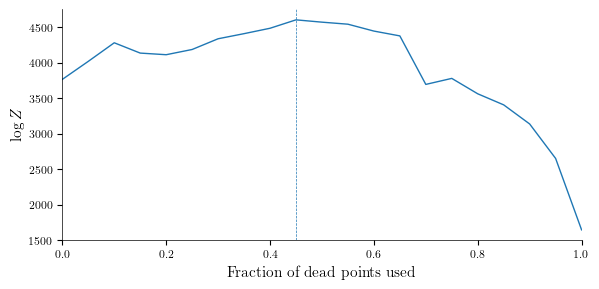

In [182]:
plt.figure(figsize=(6.7, 3))
plt.plot(alphas, logZfs, lw=1)
plt.xlabel("Fraction of dead points used")
plt.xlim(0, 1)
plt.ylabel("$\log Z$")
plt.axvline(x=alphas[np.argmax(logZfs)], ls='--', lw=.5)
plt.savefig('../../../report/figures/bandwidth_evidence.pdf', format='pdf', bbox_inches='tight')

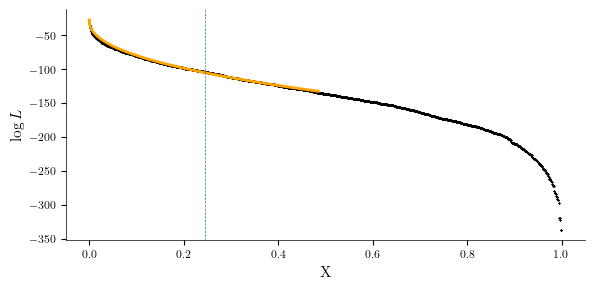

In [183]:
alphamax = alphas[np.argmax(logZfs)]
startf = int(ndead * (1 - alphamax))
Nex = startf
penalty = Nex * np.log(Nex) - Nex if Nex != 0 else 0
yf = y[startf:]
meanf = mean[startf:]
lsf = LS(yf, like, meanf)
theta_lf = lsf.minimise([2, 10, 0.1])

plt.figure(figsize=(6.7, 3))
plt.plot(mean, y, 'x', ms=1, color='black')
plt.plot(full.inverse(yf, theta_lf), yf, color='orange', lw=2)
plt.axvline(x=mean[ndead], lw=0.5, ls='--')
plt.xlabel("X")
plt.ylabel("$\log L$")
plt.savefig('../../../report/figures/bandwidth_plot.pdf', format='pdf', bbox_inches='tight')

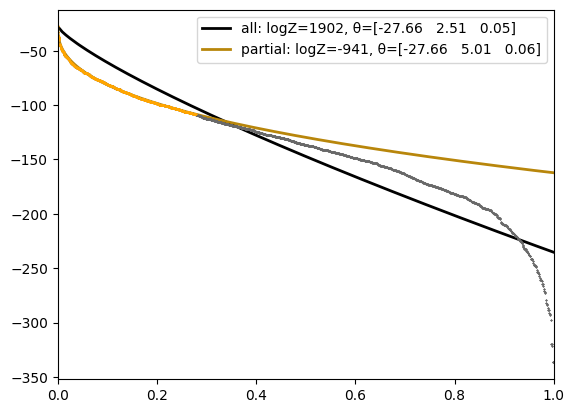

In [15]:
alpha = 0.1
ls = LS(y, like, mean)
startf = int(ndead * (1 - alpha))
Nex = startf
penalty = Nex * np.log(Nex) - Nex if Nex != 0 else 0
yf = y[startf:]
meanf = mean[startf:]
lsf = LS(yf, like, meanf)

theta_l = ls.minimise([1, 10, 0.1])
theta_lf = lsf.minimise([1, 10, 0.1])
logZ_l = ls.logZ(theta_l)
logZ_lf = lsf.logZ(theta_lf) - penalty
# plt.figure(figsize=(6,6))
plt.plot(like.inverse(y, theta_l), y, label=f'all: logZ={logZ_l:.0f}, θ={np.round(theta_l, 2)}', lw=2, color='black')
plt.plot(like.inverse(y, theta_lf), y, label=f'partial: logZ={logZ_lf:.0f}, θ={np.round(theta_lf, 2)}', lw=2, color='darkgoldenrod')
plt.plot(mean, y, 'x', ms=1, color='dimgray')
plt.plot(meanf, yf, 'x', ms=1, color='orange')
plt.xlim(0, 1)
plt.legend();

In [169]:
from ipywidgets import interact, FloatSlider
@interact(alpha=FloatSlider(min=0, max=1, step=0.1))
def func(alpha):
    ls = LS(y, like, mean)
    # alpha = 0
    startf = int(ndead * (1 - alpha))
    Nex = startf
    penalty = Nex * np.log(Nex) - Nex if Nex != 0 else 0
    yf = y[startf:]
    meanf = mean[startf:]
    lsf = LS(yf, like, meanf)

    theta_l = ls.minimise([1, 10, 0.1])
    theta_lf = lsf.minimise([1, 10, 0.1])
    logZ_l = ls.logZ(theta_l)
    logZ_lf = lsf.logZ(theta_lf)# - penalty
    # plt.figure(figsize=(6,6))
    plt.plot(like.inverse(y, theta_l), y, label=f'all: logZ={logZ_l:.0f}, θ={np.round(theta_l, 2)}', lw=2, color='black')
    plt.plot(like.inverse(y, theta_lf), y, label=f'partial: logZ={logZ_lf:.0f}, θ={np.round(theta_lf, 2)}', lw=2, color='darkgoldenrod')
    plt.plot(mean, y, 'x', ms=1, color='dimgray')
    plt.plot(meanf, yf, 'x', ms=1, color='orange')
    plt.xlim(0, 1)
    plt.legend();

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…